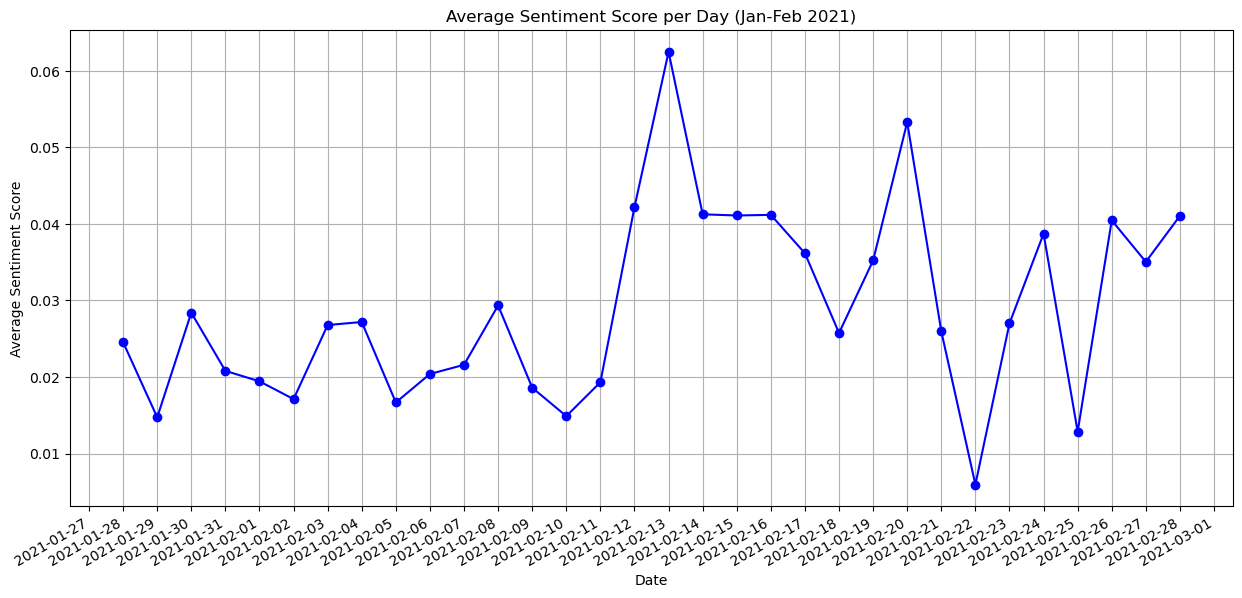

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data from CSV
df = pd.read_csv('NewsAndMarket - Kopi.csv')

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Ensure the 'title_sentiment' column is numeric
df['title_sentiment'] = pd.to_numeric(df['title_sentiment'], errors='coerce')

# Drop rows where 'timestamp' or 'title_sentiment' is NaN (if any)
df.dropna(subset=['timestamp', 'title_sentiment'], inplace=True)

# Set the 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Calculate the average sentiment score for each day
average_daily_sentiment = df.resample('D')['title_sentiment'].mean()

# Filter the data to include only January and February of 2021
filtered_average_sentiment = average_daily_sentiment['2021-01-01':'2021-02-28'].reset_index()

# Plotting the filtered data
plt.figure(figsize=(15, 7))
plt.plot(filtered_average_sentiment['timestamp'], filtered_average_sentiment['title_sentiment'], marker='o', color='b')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.title('Average Sentiment Score per Day (Jan-Feb 2021)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

# Show plot
plt.show()
